#Summary

The goal of this notebook is to analyze some customer data regarding activity vs. inactivity and in terms of socioeconomic data.
First, the customers are classified into active and inactive customers, and it turns out that only 38.4% of all 456373 unique customer IDs are classified as active. To continue the investigating the customer IDs are then classified into a total of three categories and two subcategories:
1. Customers that are only active throughout the entire dataset
2. Customers that are only inactive throughout the entire dataset
  - 2a) Customers that are only inactive but have products
  - 2b) Customers that are only inactive but do not have products
3. Customers that switch between active and inactive

The customers in group 3 are analyzed further, we are particularly interested in those 19,398 customers that start out as active and later become inactive. During the analysis it becomes clear that when first signing up the active customers were more likely to have a debit card, a payroll account, an em accout, a pension plan, payroll payments, and a credit card than those customers who started out as active and later became inactive.

Keeping this activity/inactivity categorization in mind we also analyze the socioeconomic data such as age, salary, countries and gender. As it turns out the mean age of those customers who are active throughout the entire dataset is higher than for the rest. We also investigate how useful the different socioeconomic features are if we want to build machine-learning models later. For example, the salary colummn should not be used for any model buidling as it contains a high number of outliers and missing values. The customer business segment, on the other hand, seems to be an interesting feature as there is a decent number of unique customer IDs in all three possible categories.

### 0) Import libraries

In [ ]:
#pandas and numpy
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

from datetime import datetime

#plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1) Load data

Load all three csv files into separate dataframes

In [ ]:
#commercial activity
df_com = pd.read_csv("/content/drive/MyDrive/easyMoney_data/data/commercial_activity_df.csv", index_col = 0)
df_com.shape

(5962924, 6)

In [ ]:
df_com.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO


In [ ]:
#product data
df_pro = pd.read_csv("/content/drive/MyDrive/easyMoney_data/data/products_df.csv", index_col = 0)
df_pro.shape

(5962924, 17)

In [ ]:
df_pro.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [ ]:
#sociodemographic data
df_soc = pd.read_csv("/content/drive/MyDrive/easyMoney_data/data/sociodemographic_df.csv", index_col = 0)
df_soc.shape

(5962924, 8)

In [ ]:
df_soc.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,ES,29.0,H,35,N,87218.10
1,1050611,2018-01-28,ES,13.0,V,23,N,35548.74
2,1050612,2018-01-28,ES,13.0,V,23,N,122179.11
3,1050613,2018-01-28,ES,50.0,H,22,N,119775.54
4,1050614,2018-01-28,ES,50.0,V,23,N,NaN


### 2) Datatypes, unique values and missing values

In [ ]:
display(df_com.dtypes)
display(df_pro.dtypes)
display(df_soc.dtypes)

pk_cid               int64
pk_partition        object
entry_date          object
entry_channel       object
active_customer    float64
segment             object
dtype: object

pk_cid                  int64
pk_partition           object
short_term_deposit      int64
loans                   int64
mortgage                int64
funds                   int64
securities              int64
long_term_deposit       int64
em_account_pp           int64
credit_card             int64
payroll               float64
pension_plan          float64
payroll_account         int64
emc_account             int64
debit_card              int64
em_account_p            int64
em_acount               int64
dtype: object

pk_cid            int64
pk_partition     object
country_id       object
region_code     float64
gender           object
age               int64
deceased         object
salary          float64
dtype: object

'entry_date' and 'pk_partition' should be cast into date format, the rest of the datatypes look ok.

In [ ]:
#change 'pk_partition' into date format
df_com['pk_partition'] = pd.to_datetime(df_com['pk_partition'], format= '%Y-%m-%d')
df_pro['pk_partition'] = pd.to_datetime(df_pro['pk_partition'], format= '%Y-%m-%d')
df_soc['pk_partition'] = pd.to_datetime(df_soc['pk_partition'], format= '%Y-%m-%d')
display(df_com.dtypes)
display(df_pro.dtypes)
display(df_soc.dtypes)

pk_cid                      int64
pk_partition       datetime64[ns]
entry_date                 object
entry_channel              object
active_customer           float64
segment                    object
dtype: object

pk_cid                         int64
pk_partition          datetime64[ns]
short_term_deposit             int64
loans                          int64
mortgage                       int64
funds                          int64
securities                     int64
long_term_deposit              int64
em_account_pp                  int64
credit_card                    int64
payroll                      float64
pension_plan                 float64
payroll_account                int64
emc_account                    int64
debit_card                     int64
em_account_p                   int64
em_acount                      int64
dtype: object

pk_cid                   int64
pk_partition    datetime64[ns]
country_id              object
region_code            float64
gender                  object
age                      int64
deceased                object
salary                 float64
dtype: object

In [ ]:
#identify entry date values that contain '02-29' of a non leap-year to '02-28' (so that the format can be converted to date)
df_0229 = df_com[df_com['entry_date'].str.contains('02-29')]
display(df_0229['entry_date'].unique())

array(['2015-02-29', '2019-02-29'], dtype=object)

In [ ]:
#change identified values to '02-28' and update data types
df_com['entry_date'] = df_com['entry_date'].replace(['2015-02-29'], '2015-02-28')
df_com['entry_date'] = df_com['entry_date'].replace(['2019-02-29'], '2019-02-28')
df_com['entry_date'] = pd.to_datetime(df_com['entry_date'], format= '%Y-%m-%d')
df_com.dtypes

pk_cid                      int64
pk_partition       datetime64[ns]
entry_date         datetime64[ns]
entry_channel              object
active_customer           float64
segment                    object
dtype: object

Check unique values per column

In [ ]:
display(df_com.nunique())
display(df_pro.nunique())
display(df_soc.nunique())

pk_cid             456373
pk_partition           17
entry_date           1497
entry_channel          68
active_customer         2
segment                 3
dtype: int64

pk_cid                456373
pk_partition              17
short_term_deposit         2
loans                      2
mortgage                   2
funds                      2
securities                 2
long_term_deposit          2
em_account_pp              1
credit_card                2
payroll                    2
pension_plan               2
payroll_account            2
emc_account                2
debit_card                 2
em_account_p               2
em_acount                  2
dtype: int64

pk_cid          456373
pk_partition        17
country_id          41
region_code         52
gender               2
age                104
deceased             2
salary          258629
dtype: int64

Check number of missing values

In [ ]:
display(df_com.isna().sum())
display(df_pro.isna().sum())
display(df_soc.isna().sum())

pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      133033
active_customer         0
segment            133944
dtype: int64

pk_cid                 0
pk_partition           0
short_term_deposit     0
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit      0
em_account_pp          0
credit_card            0
payroll               61
pension_plan          61
payroll_account        0
emc_account            0
debit_card             0
em_account_p           0
em_acount              0
dtype: int64

pk_cid                0
pk_partition          0
country_id            0
region_code        2264
gender               25
age                   0
deceased              0
salary          1512103
dtype: int64

Several columns contain missing values: entry channel, segment, payroll, pension plan, region code, gender, salary

### 3) Descriptive analysis

#### 3.1) Classify active and inactive customers

In [ ]:
#check how many unique customer IDs there are among active vs. inactive customers
df1 = pd.DataFrame(df_com.groupby("active_customer")['pk_cid'].nunique()).reset_index()
df1.head()

,active_customer,pk_cid
0,0.0,317179
1,1.0,197731


In [ ]:
#check percentage of active customers
print("Perceantage of active customers in the dataset:",(df1.iloc[1,1]/(df1.iloc[0,1]+df1.iloc[1,1])*100).round(2),"%")

Perceantage of active customers in the dataset: 38.4 %


Text(0, 0.5, 'Count')

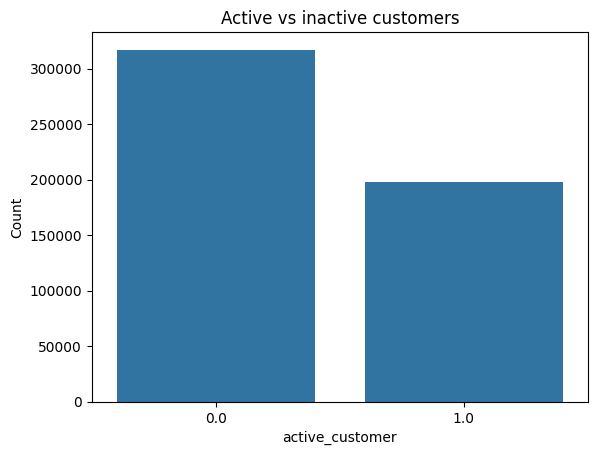

In [ ]:
#plot active vs. inactive customers
sns.barplot(data=df1, x='active_customer', y='pk_cid')
plt.title('Active vs inactive customers')
plt.ylabel('Count')

Only 38.4% of the customers are actually active customers.

In order to improve this classification more information is added to the dataframe: Whether customer IDs have always the same activity status or if there are switches from one to the other

In [ ]:
#create unique identifier in commercial activity df
df_com['pk'] = df_com['pk_cid'].astype(str)+df_com['pk_partition'].astype(str)
df_com.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,pk
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES,13755862018-01-28
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,10506112018-01-28
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,10506122018-01-28
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO,10506132018-01-28
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO,10506142018-01-28


Check which customer IDs have one and which have two unique values in the 'active_customer' column

In [ ]:
grouped = pd.DataFrame(df_com.groupby('pk_cid')['active_customer'].nunique()).reset_index()
grouped

,pk_cid,active_customer
0,15891,2
1,16063,2
2,16203,2
3,16502,2
4,17457,1
...,...,...
456368,1553685,1
456369,1553686,1
456370,1553687,1
456371,1553688,1


Customer IDs with two values are both active and inactive, customers with only one value are either active or inactive

In [ ]:
cond = grouped['active_customer']==2
grouped['active_customer']= np.where(cond,'Both active and inactive', 'Only active or inactive')
grouped.rename(columns={'active_customer': 'activity_status'}, inplace=True)
grouped

,pk_cid,activity_status
0,15891,Both active and inactive
1,16063,Both active and inactive
2,16203,Both active and inactive
3,16502,Both active and inactive
4,17457,Only active or inactive
...,...,...
456368,1553685,Only active or inactive
456369,1553686,Only active or inactive
456370,1553687,Only active or inactive
456371,1553688,Only active or inactive


In [ ]:
#check that there are no null values
grouped['activity_status'].unique()

array(['Both active and inactive', 'Only active or inactive'],
      dtype=object)

Each customer ID is either "Both active or inactive" or "Only active or inactive". This information is added to the product df.

In [ ]:
#prepare product df for merge: add unique identifier out of pk_cid and pk_partition to product df
#drop irrelevant "em_account_pp" column, which is "0" everywhere
df_pro['pk'] = df_pro['pk_cid'].astype(str)+df_pro['pk_partition'].astype(str)
df_pro.drop(columns='em_account_pp', inplace=True)
df_pro.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,pk
0,1375586,2018-01-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-01-28
1,1050611,2018-01-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,10506112018-01-28
2,1050612,2018-01-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,10506122018-01-28
3,1050613,2018-01-28,1,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,10506132018-01-28
4,1050614,2018-01-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,10506142018-01-28


In [ ]:
#add information about customer activity to product df
df_pro2 = pd.merge(df_pro, df_com[['pk', 'pk_cid', 'active_customer']], on='pk')
df_pro2.rename(columns={'pk_cid_x': 'pk_cid'}, inplace=True)
df_pro2.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,pk,pk_cid_y,active_customer
0,1375586,2018-01-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-01-28,1375586,1.0
1,1050611,2018-01-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,10506112018-01-28,1050611,0.0
2,1050612,2018-01-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,10506122018-01-28,1050612,0.0
3,1050613,2018-01-28,1,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,10506132018-01-28,1050613,0.0
4,1050614,2018-01-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,10506142018-01-28,1050614,1.0


In [ ]:
#add customer activity status to product df
df_pro3 = pd.merge(df_pro2, grouped, on='pk_cid')
df_pro3.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,pk,pk_cid_y,active_customer,activity_status
0,1375586,2018-01-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-01-28,1375586,1.0,Both active and inactive
1,1375586,2018-02-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-02-28,1375586,1.0,Both active and inactive
2,1375586,2018-03-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-03-28,1375586,1.0,Both active and inactive
3,1375586,2018-04-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-04-28,1375586,1.0,Both active and inactive
4,1375586,2018-05-28,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,1,13755862018-05-28,1375586,1.0,Both active and inactive


Add more information: check if there are inactive customers that never hire any products
*   Add sum of activated products to product df
*   Summarize value per customer ID


In [ ]:
columns_to_sum = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
sum_of_cols = df_pro3.iloc[:, columns_to_sum].sum(axis=1)
df_pro3['product_sum'] = sum_of_cols
df_pro3.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,pk,pk_cid_y,active_customer,activity_status,product_sum
0,1375586,2018-01-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-01-28,1375586,1.0,Both active and inactive,1.0
1,1375586,2018-02-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-02-28,1375586,1.0,Both active and inactive,1.0
2,1375586,2018-03-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-03-28,1375586,1.0,Both active and inactive,1.0
3,1375586,2018-04-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-04-28,1375586,1.0,Both active and inactive,1.0
4,1375586,2018-05-28,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,1,13755862018-05-28,1375586,1.0,Both active and inactive,2.0


In [ ]:
sum_by_cust = pd.DataFrame(df_pro3.groupby('pk_cid')['product_sum'].sum()).reset_index()
sum_by_cust.rename(columns={'product_sum': 'product_sum_by_cust'}, inplace=True)
sum_by_cust

,pk_cid,product_sum_by_cust
0,15891,1.0
1,16063,0.0
2,16203,5.0
3,16502,13.0
4,17457,38.0
...,...,...
456368,1553685,0.0
456369,1553686,0.0
456370,1553687,0.0
456371,1553688,0.0


Merge information back to original dataframe

In [ ]:
df_pro4 = pd.merge(df_pro3, sum_by_cust, on='pk_cid')
df_pro4.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,pk,pk_cid_y,active_customer,activity_status,product_sum,product_sum_by_cust
0,1375586,2018-01-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-01-28,1375586,1.0,Both active and inactive,1.0,21.0
1,1375586,2018-02-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-02-28,1375586,1.0,Both active and inactive,1.0,21.0
2,1375586,2018-03-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-03-28,1375586,1.0,Both active and inactive,1.0,21.0
3,1375586,2018-04-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-04-28,1375586,1.0,Both active and inactive,1.0,21.0
4,1375586,2018-05-28,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,1,13755862018-05-28,1375586,1.0,Both active and inactive,2.0,21.0


Split customers into categories
1. Customers that are only active throughout the entire dataset
2. Customers that are only inactive throughout the entire dataset

2a) Customers that are only inactive but have products
2b) Customers that are only inactive but do not have products

3. Customers that switch between active and inactive

In [ ]:
#category1: customer is always active
cond1 = df_pro4['activity_status']=='Only active or inactive'
cond2 = df_pro4['active_customer']==1

#category2a: customer is always inactive but has products
cond3 = df_pro4['product_sum_by_cust']!=0
cond1 = df_pro4['activity_status']=='Only active or inactive'
cond4 = df_pro4['active_customer']==0

#category2b: customer is always inactive and never has products
cond5 = df_pro4['product_sum_by_cust']==0
cond1 = df_pro4['activity_status']=='Only active or inactive'
cond4 = df_pro4['active_customer']==0

#category3: customer switches between active and inactive
cond6 = df_pro4['activity_status']=='Both active and inactive'


df_pro4['summary_activity_products'] = np.select([cond1&cond2, cond3&cond1&cond4, cond5&cond1&cond4, cond6],
    [
    '1) only_active',
    '2a) only_inactive_yes_products',
    '2b) only_inactive_no_products - lead',
    '3) switch between active and inactive'
    ],
    )

In [ ]:
df5 = pd.DataFrame(df_pro4.groupby('summary_activity_products')['pk_cid'].nunique()).reset_index()
df5

,summary_activity_products,pk_cid
0,1) only_active,139194
1,2a) only_inactive_yes_products,156471
2,2b) only_inactive_no_products - lead,102171
3,3) switch between active and inactive,58537


In [ ]:
print("Number of unique customer IDs in the dataset:", df_pro4['pk_cid'].nunique())
print("Number of unique inactive customer IDs with no products in the dataset:", df5.iloc[2,1])
print("(",(df5.iloc[2,1]/df_pro4['pk_cid'].nunique()*100).round(2),"%)")

Number of unique customer IDs in the dataset: 456373
Number of unique inactive customer IDs with no products in the dataset: 102171
( 22.39 %)


([0, 1, 2, 3],
 [Text(0, 0, '1) only_active'),
  Text(1, 0, '2a) only_inactive_yes_products'),
  Text(2, 0, '2b) only_inactive_no_products - lead'),
  Text(3, 0, '3) switch between active and inactive')])

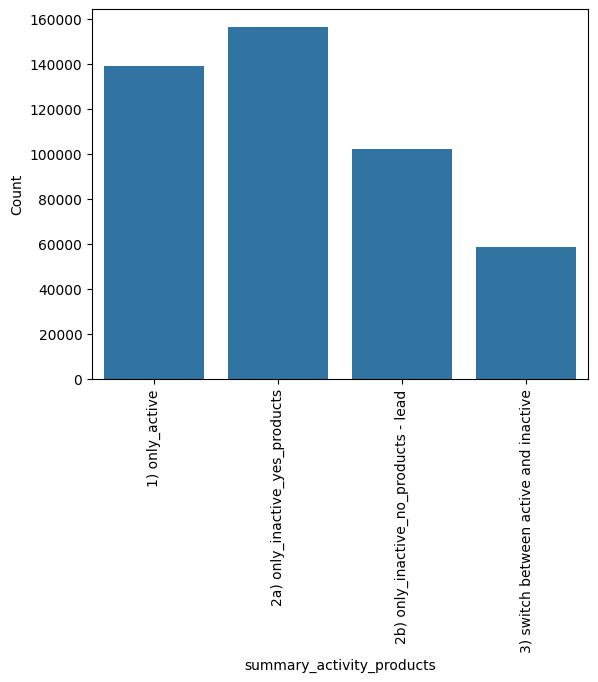

In [ ]:
sns.barplot(data=df5, x='summary_activity_products', y='pk_cid')
plt.ylabel('Count')
plt.xticks(rotation=90)

Around 22 percent of our customers are inactive and have never hired any products. It is recommended to exclude these customers from further analysis. Those are not customers, they should actually be classified as leads.

#### 3.2) Analysis of customers with switching activity status

Are there any customers who start out as inactive?
*   filter dataframe for only those customers where the activity status switches, sort pk_partition to have the earlier dates first
*   check first and last entries for each customer ID



In [ ]:
switch_cust = df_pro4[df_pro4['summary_activity_products']=="3) switch between active and inactive"]
switch_cust.sort_values(by=['pk_cid', 'pk_partition'])

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,pk,pk_cid_y,active_customer,activity_status,product_sum,product_sum_by_cust,summary_activity_products
4270476,15891,2018-07-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,158912018-07-28,15891,1.0,Both active and inactive,1.0,1.0,3) switch between active and inactive
4270477,15891,2018-08-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,158912018-08-28,15891,0.0,Both active and inactive,0.0,1.0,3) switch between active and inactive
5732411,16063,2018-11-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,160632018-11-28,16063,1.0,Both active and inactive,0.0,0.0,3) switch between active and inactive
5732412,16063,2018-12-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,160632018-12-28,16063,1.0,Both active and inactive,0.0,0.0,3) switch between active and inactive
5732413,16063,2019-01-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,160632019-01-28,16063,1.0,Both active and inactive,0.0,0.0,3) switch between active and inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954278,1548196,2019-05-28,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,1,15481962019-05-28,1548196,1.0,Both active and inactive,2.0,2.0,3) switch between active and inactive
5954281,1548197,2019-04-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,15481972019-04-28,1548197,0.0,Both active and inactive,0.0,4.0,3) switch between active and inactive
5954282,1548197,2019-05-28,0,0,0,0,0,0,0,1.0,1.0,0,0,1,0,1,15481972019-05-28,1548197,1.0,Both active and inactive,4.0,4.0,3) switch between active and inactive
5954285,1548202,2019-04-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,15482022019-04-28,1548202,0.0,Both active and inactive,0.0,1.0,3) switch between active and inactive


In [ ]:
first_last_entries = switch_cust.groupby('pk_cid').agg({'active_customer': ['first', 'last']}).reset_index()
first_last_entries

pk_cid active_customer     
                         first last
0        15891             1.0  0.0
1        16063             1.0  0.0
2        16203             0.0  1.0
3        16502             0.0  1.0
4        19021             1.0  1.0
...        ...             ...  ...
58532  1548186             0.0  1.0
58533  1548188             0.0  1.0
58534  1548196             0.0  1.0
58535  1548197             0.0  1.0
58536  1548202             0.0  1.0

[58537 rows x 3 columns]

Check differences between first and last values and classify customers accordingly

In [ ]:
first_last_entries['switch'] = first_last_entries['active_customer', 'first'] - first_last_entries['active_customer', 'last']
first_last_entries

pk_cid active_customer      switch
                         first last       
0        15891             1.0  0.0    1.0
1        16063             1.0  0.0    1.0
2        16203             0.0  1.0   -1.0
3        16502             0.0  1.0   -1.0
4        19021             1.0  1.0    0.0
...        ...             ...  ...    ...
58532  1548186             0.0  1.0   -1.0
58533  1548188             0.0  1.0   -1.0
58534  1548196             0.0  1.0   -1.0
58535  1548197             0.0  1.0   -1.0
58536  1548202             0.0  1.0   -1.0

[58537 rows x 4 columns]

In [ ]:
#classify customers:
#-1 = customer switches from 0 to 1 / inactive to active
cond1 = first_last_entries['switch']==-1

#1 = customer switches from 1 to 0 / active to inactive
cond2 = first_last_entries['switch']==1

#0 = customer switches only temporarily, first and last values are the same
cond3 = first_last_entries['switch']==0

first_last_entries['switch'] = np.select([cond1, cond2, cond3], ['from inactive to active','from active to inactive','only temporary switch'],)
first_last_entries.columns = first_last_entries.columns.get_level_values(0)
first_last_entries.drop(columns='active_customer', inplace=True)
first_last_entries

,pk_cid,switch
0,15891,from active to inactive
1,16063,from active to inactive
2,16203,from inactive to active
3,16502,from inactive to active
4,19021,only temporary switch
...,...,...
58532,1548186,from inactive to active
58533,1548188,from inactive to active
58534,1548196,from inactive to active
58535,1548197,from inactive to active


Merge classification to original dataframe

In [ ]:
switch_cust2 = pd.merge(switch_cust, first_last_entries, on='pk_cid')
switch_cust2

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,pk,pk_cid_y,active_customer,activity_status,product_sum,product_sum_by_cust,summary_activity_products,switch
0,1375586,2018-01-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-01-28,1375586,1.0,Both active and inactive,1.0,21.0,3) switch between active and inactive,only temporary switch
1,1375586,2018-02-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-02-28,1375586,1.0,Both active and inactive,1.0,21.0,3) switch between active and inactive,only temporary switch
2,1375586,2018-03-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-03-28,1375586,1.0,Both active and inactive,1.0,21.0,3) switch between active and inactive,only temporary switch
3,1375586,2018-04-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-04-28,1375586,1.0,Both active and inactive,1.0,21.0,3) switch between active and inactive,only temporary switch
4,1375586,2018-05-28,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,1,13755862018-05-28,1375586,1.0,Both active and inactive,2.0,21.0,3) switch between active and inactive,only temporary switch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692840,1323949,2019-05-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,13239492019-05-28,1323949,1.0,Both active and inactive,0.0,0.0,3) switch between active and inactive,from inactive to active
692841,1323779,2019-04-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13237792019-04-28,1323779,0.0,Both active and inactive,1.0,2.0,3) switch between active and inactive,from inactive to active
692842,1323779,2019-05-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13237792019-05-28,1323779,1.0,Both active and inactive,1.0,2.0,3) switch between active and inactive,from inactive to active
692843,1302603,2019-04-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,13026032019-04-28,1302603,0.0,Both active and inactive,0.0,1.0,3) switch between active and inactive,from inactive to active


In [ ]:
df6 = pd.DataFrame(switch_cust2.groupby('switch')['pk_cid'].nunique())
df6

,pk_cid
switch,
from active to inactive,19398
from inactive to active,25457
only temporary switch,13682


Among those customers whose activity status switched throughout the dataset there are 25457 customers who started out as inactive and later became active. It is recommended to not sign up inactive customers, instead those should be classified as a lead. There are also 19398 customers who started out as active and later became inactive. We will analyse those customers closer, those are lost customers.

([0, 1, 2],
 [Text(0, 0, 'from active to inactive'),
  Text(1, 0, 'from inactive to active'),
  Text(2, 0, 'only temporary switch')])

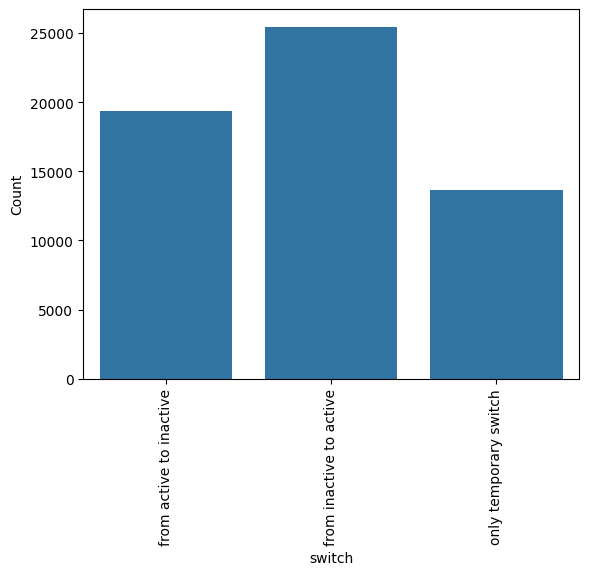

In [ ]:
sns.barplot(data=df6, x=df6.index, y='pk_cid')
plt.ylabel('Count')
plt.xticks(rotation=90)

In [ ]:
#create "lost" dataframe with customers who went from active to inactive, sort by customer ID and pk partition
lost = switch_cust2[switch_cust2['switch']=='from active to inactive']
lost.sort_values(by=['pk_cid', 'pk_partition'], inplace=True)

<ipython-input-40-f54e81b2b503>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lost.sort_values(by=['pk_cid', 'pk_partition'], inplace=True)


#### 3.3) Analysis of lost customers and their product use

##### 3.3.1) Compared to active customers

Check which products were the first ones that the lost customers used

In [ ]:
#drop duplicates and keep only the first value
lost.drop_duplicates(subset='pk_cid', keep='first', inplace=True)
lost.shape

<ipython-input-41-09318c5dc1cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lost.drop_duplicates(subset='pk_cid', keep='first', inplace=True)


(19398, 24)

In [ ]:
lost.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,pk,pk_cid_y,active_customer,activity_status,product_sum,product_sum_by_cust,summary_activity_products,switch
453297,15891,2018-07-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,158912018-07-28,15891,1.0,Both active and inactive,1.0,1.0,3) switch between active and inactive,from active to inactive
641043,16063,2018-11-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,160632018-11-28,16063,1.0,Both active and inactive,0.0,0.0,3) switch between active and inactive,from active to inactive
397210,20315,2018-01-28,0,0,0,0,0,1,0,0.0,0.0,0,0,0,0,0,203152018-01-28,20315,1.0,Both active and inactive,1.0,7.0,3) switch between active and inactive,from active to inactive
397240,20919,2018-01-28,0,0,0,0,1,0,0,0.0,0.0,0,0,0,0,0,209192018-01-28,20919,1.0,Both active and inactive,1.0,11.0,3) switch between active and inactive,from active to inactive
397257,23434,2018-01-28,0,0,0,0,0,1,0,0.0,0.0,0,0,0,0,0,234342018-01-28,23434,1.0,Both active and inactive,1.0,11.0,3) switch between active and inactive,from active to inactive


In [ ]:
#create dataframe to see how many customers have each of the products when they first sign up
data = {
    'short_term_deposit': (lost['short_term_deposit']>0).sum(),
    'loans': (lost['loans']>0).sum(),
    'mortgage':(lost['mortgage']>0).sum(),
    'funds': (lost['funds']>0).sum(),
    'securities': (lost['securities']>0).sum(),
    'long_term_deposit': (lost['long_term_deposit']>0).sum(),
    'credit_card': (lost['credit_card']>0).sum(),
    'payroll': (lost['payroll']>0).sum(),
    'pension_plan': (lost['pension_plan']>0).sum(),
    'payroll_account': (lost['payroll_account']>0).sum(),
    'emc_account': (lost['emc_account']>0).sum(),
    'debit_card': (lost['debit_card']>0).sum(),
    'em_account_p': (lost['em_account_p']>0).sum(),
    'em_acount': (lost['em_acount']>0).sum(),
}

new = pd.DataFrame(data, index=data.keys())
new_ = new.iloc[0].T.reset_index()
new_.rename(columns={'short_term_deposit': 'number_of_customers'}, inplace=True)
new_['perc'] = ((new_['number_of_customers']/19398)*100).round(2)
new_

,index,number_of_customers,perc
0,short_term_deposit,681,3.51
1,loans,1,0.01
2,mortgage,0,0.00
3,funds,31,0.16
4,securities,25,0.13
5,long_term_deposit,631,3.25
6,credit_card,192,0.99
7,payroll,389,2.01
8,pension_plan,418,2.15
9,payroll_account,687,3.54


In [ ]:
new_.sort_values(by='perc', ascending = False, inplace=True)

The vast majority of lost customers start out with an em acount (87%). All the other products are only held by less than 10% of the lost customers. None of these customers has a mortgage or an em_account_p in the first pk partition.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'em_acount'),
  Text(1, 0, 'debit_card'),
  Text(2, 0, 'emc_account'),
  Text(3, 0, 'payroll_account'),
  Text(4, 0, 'short_term_deposit'),
  Text(5, 0, 'long_term_deposit'),
  Text(6, 0, 'pension_plan'),
  Text(7, 0, 'payroll'),
  Text(8, 0, 'credit_card'),
  Text(9, 0, 'funds'),
  Text(10, 0, 'securities'),
  Text(11, 0, 'loans'),
  Text(12, 0, 'mortgage'),
  Text(13, 0, 'em_account_p')])

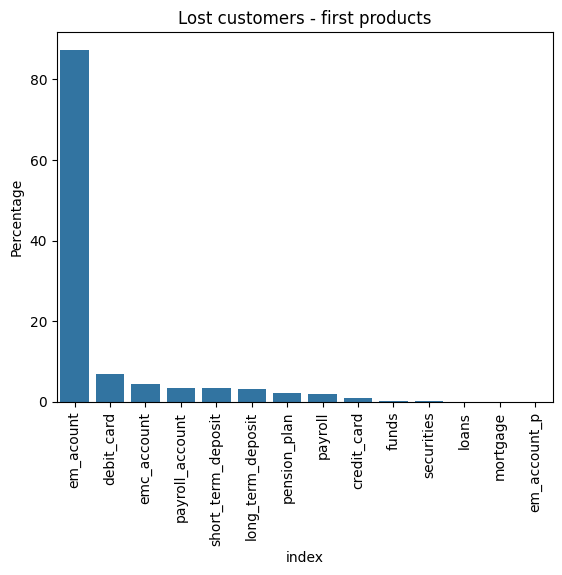

In [ ]:
sns.barplot(data=new_, x=new_['index'], y='perc')
plt.title('Lost customers - first products')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

-----

Let's repeat this exercise for those customers who remain active throughout the entire time.

In [ ]:
act = df_pro4[df_pro4['summary_activity_products']=='1) only_active']
act.sort_values(by=['pk_cid', 'pk_partition'], inplace=True)


<ipython-input-46-01eaf2d99572>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act.sort_values(by=['pk_cid', 'pk_partition'], inplace=True)


In [ ]:
act.drop_duplicates(subset='pk_cid', keep='first', inplace=True)
act.shape

<ipython-input-47-9c5a4c800783>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act.drop_duplicates(subset='pk_cid', keep='first', inplace=True)


(139194, 23)

In [ ]:
#create dataframe to see how many customers have each of the products when they first sign up
data2 = {
    'short_term_deposit': (act['short_term_deposit']>0).sum(),
    'loans': (act['loans']>0).sum(),
    'mortgage':(act['mortgage']>0).sum(),
    'funds': (act['funds']>0).sum(),
    'securities': (act['securities']>0).sum(),
    'long_term_deposit': (act['long_term_deposit']>0).sum(),
    'credit_card': (act['credit_card']>0).sum(),
    'payroll': (act['payroll']>0).sum(),
    'pension_plan': (act['pension_plan']>0).sum(),
    'payroll_account': (act['payroll_account']>0).sum(),
    'emc_account': (act['emc_account']>0).sum(),
    'debit_card': (act['debit_card']>0).sum(),
    'em_account_p': (act['em_account_p']>0).sum(),
    'em_acount': (act['em_acount']>0).sum(),
}

new2 = pd.DataFrame(data2, index=data2.keys())
new2_ = new2.iloc[0].T.reset_index()
new2_.rename(columns={'short_term_deposit': 'number_of_customers'}, inplace=True)
new2_['perc'] = ((new2_['number_of_customers']/139194)*100).round(2)
new2_

,index,number_of_customers,perc
0,short_term_deposit,1474,1.06
1,loans,19,0.01
2,mortgage,15,0.01
3,funds,763,0.55
4,securities,943,0.68
5,long_term_deposit,4644,3.34
6,credit_card,3028,2.18
7,payroll,8178,5.88
8,pension_plan,8823,6.34
9,payroll_account,12614,9.06


In [ ]:
new2_.sort_values(by='perc', ascending = False, inplace=True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'em_acount'),
  Text(1, 0, 'debit_card'),
  Text(2, 0, 'payroll_account'),
  Text(3, 0, 'emc_account'),
  Text(4, 0, 'pension_plan'),
  Text(5, 0, 'payroll'),
  Text(6, 0, 'long_term_deposit'),
  Text(7, 0, 'credit_card'),
  Text(8, 0, 'short_term_deposit'),
  Text(9, 0, 'securities'),
  Text(10, 0, 'funds'),
  Text(11, 0, 'loans'),
  Text(12, 0, 'mortgage'),
  Text(13, 0, 'em_account_p')])

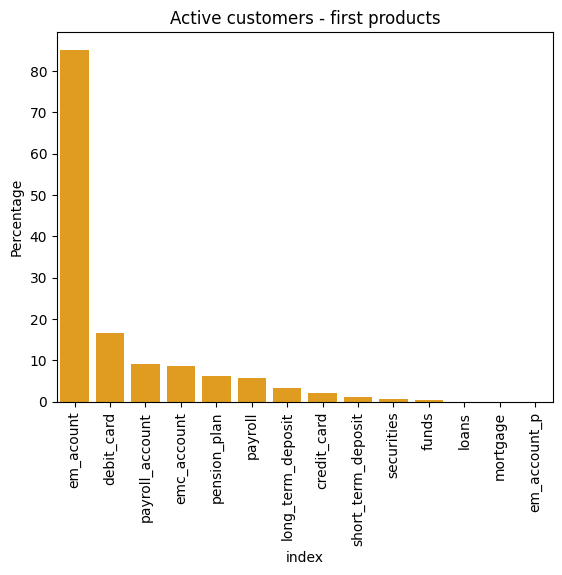

In [ ]:
sns.barplot(data=new2_, x = 'index', y= 'perc', color='orange')
plt.title('Active customers - first products')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

In [ ]:
#combine data for lost and active customer in order to be able to compare both
new3 = pd.merge(new_, new2_, on='index')
new3['diff']= new3['perc_y']- new3['perc_x']
new3.sort_values(by='diff', ascending = False, inplace=True)
new3

,index,number_of_customers_x,perc_x,number_of_customers_y,perc_y,diff
1,debit_card,1318,6.79,23052,16.56,9.77
3,payroll_account,687,3.54,12614,9.06,5.52
2,emc_account,846,4.36,12039,8.65,4.29
6,pension_plan,418,2.15,8823,6.34,4.19
7,payroll,389,2.01,8178,5.88,3.87
8,credit_card,192,0.99,3028,2.18,1.19
10,securities,25,0.13,943,0.68,0.55
9,funds,31,0.16,763,0.55,0.39
5,long_term_deposit,631,3.25,4644,3.34,0.09
12,mortgage,0,0.00,15,0.01,0.01


Looking at the percentages, it becomes clear that when first signing up the active customers were more likely to have a debit card, a payroll account, an em accout, a pension plan, payroll payments, and a credit card than those customers who started out as active and later became inactive.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'debit_card'),
  Text(1, 0, 'payroll_account'),
  Text(2, 0, 'emc_account'),
  Text(3, 0, 'pension_plan'),
  Text(4, 0, 'payroll'),
  Text(5, 0, 'credit_card'),
  Text(6, 0, 'securities'),
  Text(7, 0, 'funds'),
  Text(8, 0, 'long_term_deposit'),
  Text(9, 0, 'mortgage'),
  Text(10, 0, 'loans'),
  Text(11, 0, 'em_account_p'),
  Text(12, 0, 'em_acount'),
  Text(13, 0, 'short_term_deposit')])

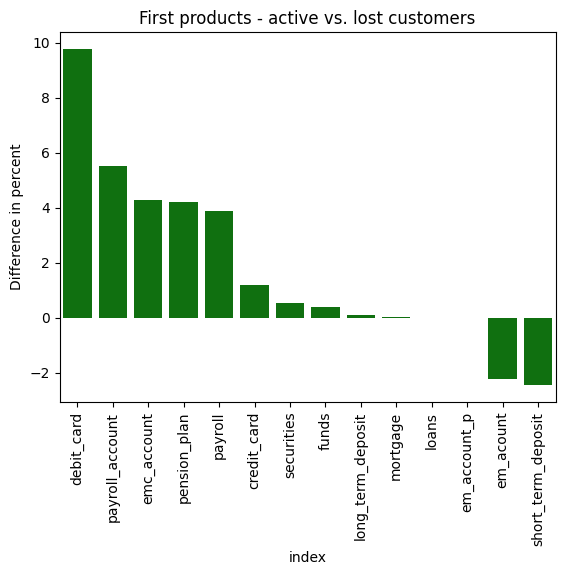

In [ ]:
sns.barplot(data=new3, x = 'index', y= 'diff', color='green')
plt.title('First products - active vs. lost customers')
plt.ylabel('Difference in percent')
plt.xticks(rotation=90)

##### 3.3.2) Comparison first and last products

Which were the last products that the lost customers used?

In [ ]:
lost2 = switch_cust2[switch_cust2['switch']=='from active to inactive']
lost2.sort_values(by=['pk_cid', 'pk_partition'], inplace=True)

<ipython-input-53-f158592f3bf3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lost2.sort_values(by=['pk_cid', 'pk_partition'], inplace=True)


In [ ]:
lost2.drop_duplicates(subset='pk_cid', keep='last', inplace=True)
lost2.shape

<ipython-input-54-79fef837b25b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lost2.drop_duplicates(subset='pk_cid', keep='last', inplace=True)


(19398, 24)

In [ ]:
#create dataframe to see how many customers have each of the products when they first sign up
data3 = {
    'short_term_deposit': (lost2['short_term_deposit']>0).sum(),
    'loans': (lost2['loans']>0).sum(),
    'mortgage':(lost2['mortgage']>0).sum(),
    'funds': (lost2['funds']>0).sum(),
    'securities': (lost2['securities']>0).sum(),
    'long_term_deposit': (lost2['long_term_deposit']>0).sum(),
    'credit_card': (lost2['credit_card']>0).sum(),
    'payroll': (lost2['payroll']>0).sum(),
    'pension_plan': (lost2['pension_plan']>0).sum(),
    'payroll_account': (lost2['payroll_account']>0).sum(),
    'emc_account': (lost2['emc_account']>0).sum(),
    'debit_card': (lost2['debit_card']>0).sum(),
    'em_account_p': (lost2['em_account_p']>0).sum(),
    'em_acount': (lost2['em_acount']>0).sum(),
}

new4 = pd.DataFrame(data3, index=data3.keys())
new4_ = new4.iloc[0].T.reset_index()
new4_.rename(columns={'short_term_deposit': 'number_of_customers'}, inplace=True)
new4_['perc'] = ((new4_['number_of_customers']/139194)*100).round(2)
new4_

,index,number_of_customers,perc
0,short_term_deposit,0,0.00
1,loans,0,0.00
2,mortgage,0,0.00
3,funds,1,0.00
4,securities,3,0.00
5,long_term_deposit,0,0.00
6,credit_card,18,0.01
7,payroll,16,0.01
8,pension_plan,20,0.01
9,payroll_account,537,0.39


In [ ]:
new4_.sort_values(by='perc', inplace=True, ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'em_acount'),
  Text(1, 0, 'emc_account'),
  Text(2, 0, 'payroll_account'),
  Text(3, 0, 'debit_card'),
  Text(4, 0, 'credit_card'),
  Text(5, 0, 'payroll'),
  Text(6, 0, 'pension_plan'),
  Text(7, 0, 'short_term_deposit'),
  Text(8, 0, 'loans'),
  Text(9, 0, 'mortgage'),
  Text(10, 0, 'funds'),
  Text(11, 0, 'securities'),
  Text(12, 0, 'long_term_deposit'),
  Text(13, 0, 'em_account_p')])

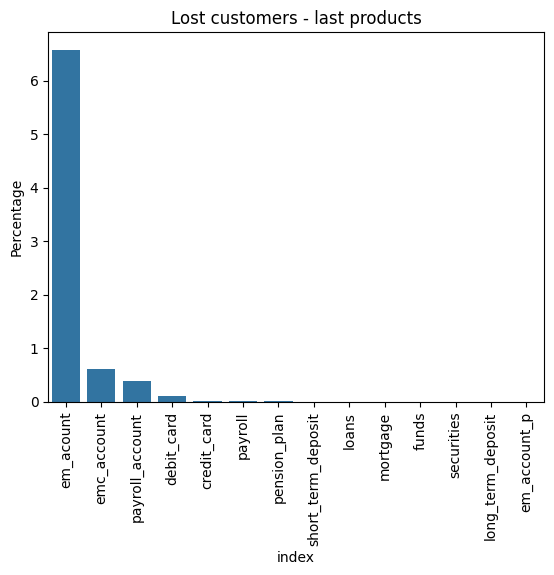

In [ ]:
sns.barplot(data=new4_, x = 'index', y= 'perc')
plt.title('Lost customers - last products')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

Compare first and last products for lost customers

In [ ]:
new5 = pd.merge(new4_, new_, on='index')
new5

,index,number_of_customers_x,perc_x,number_of_customers_y,perc_y
0,em_acount,9153,6.58,16943,87.34
1,emc_account,854,0.61,846,4.36
2,payroll_account,537,0.39,687,3.54
3,debit_card,152,0.11,1318,6.79
4,credit_card,18,0.01,192,0.99
5,payroll,16,0.01,389,2.01
6,pension_plan,20,0.01,418,2.15
7,short_term_deposit,0,0.00,681,3.51
8,loans,0,0.00,1,0.01
9,mortgage,0,0.00,0,0.00


In [ ]:
new5['diff'] = new5['perc_x']-new5['perc_y']
new5.sort_values(by='diff', inplace=True)
new5

,index,number_of_customers_x,perc_x,number_of_customers_y,perc_y,diff
0,em_acount,9153,6.58,16943,87.34,-80.76
3,debit_card,152,0.11,1318,6.79,-6.68
1,emc_account,854,0.61,846,4.36,-3.75
7,short_term_deposit,0,0.00,681,3.51,-3.51
12,long_term_deposit,0,0.00,631,3.25,-3.25
2,payroll_account,537,0.39,687,3.54,-3.15
6,pension_plan,20,0.01,418,2.15,-2.14
5,payroll,16,0.01,389,2.01,-2.00
4,credit_card,18,0.01,192,0.99,-0.98
10,funds,1,0.00,31,0.16,-0.16


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'em_acount'),
  Text(1, 0, 'debit_card'),
  Text(2, 0, 'emc_account'),
  Text(3, 0, 'short_term_deposit'),
  Text(4, 0, 'long_term_deposit'),
  Text(5, 0, 'payroll_account'),
  Text(6, 0, 'pension_plan'),
  Text(7, 0, 'payroll'),
  Text(8, 0, 'credit_card'),
  Text(9, 0, 'funds'),
  Text(10, 0, 'securities'),
  Text(11, 0, 'loans'),
  Text(12, 0, 'mortgage'),
  Text(13, 0, 'em_account_p')])

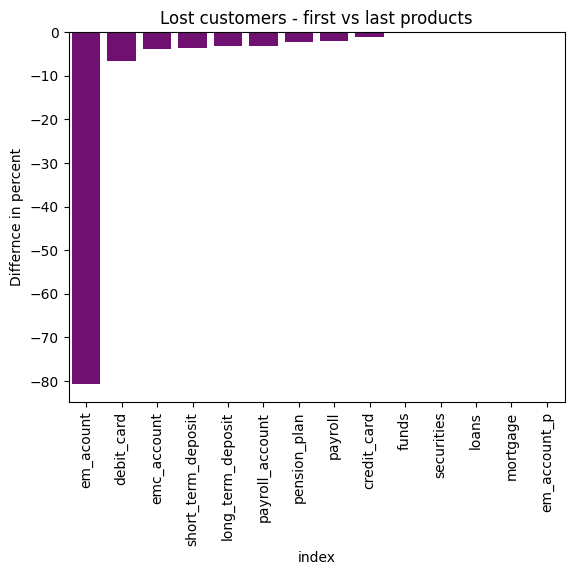

In [ ]:
#plot
sns.barplot(data=new5, x='index', y='diff', color='purple')
plt.title('Lost customers - first vs last products')
plt.ylabel('Differnce in percent')
plt.xticks(rotation=90)

Looking at the last entry for the lost customers the percentages decreased for all products. For example, when these customers signed up 87.34% had an em account, but at the end that percentage decreased to 6.58%.

#### 3.4) Analysis of socioeconomic data

Add categorization to socioeconomic df

In [ ]:
df_pro4.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,pk,pk_cid_y,active_customer,activity_status,product_sum,product_sum_by_cust,summary_activity_products
0,1375586,2018-01-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-01-28,1375586,1.0,Both active and inactive,1.0,21.0,3) switch between active and inactive
1,1375586,2018-02-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-02-28,1375586,1.0,Both active and inactive,1.0,21.0,3) switch between active and inactive
2,1375586,2018-03-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-03-28,1375586,1.0,Both active and inactive,1.0,21.0,3) switch between active and inactive
3,1375586,2018-04-28,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,13755862018-04-28,1375586,1.0,Both active and inactive,1.0,21.0,3) switch between active and inactive
4,1375586,2018-05-28,0,0,0,0,0,0,0,0.0,0.0,0,0,1,0,1,13755862018-05-28,1375586,1.0,Both active and inactive,2.0,21.0,3) switch between active and inactive


In [ ]:
df_soc['pk'] = df_soc['pk_cid'].astype(str)+df_soc['pk_partition'].astype(str)
df_soc.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary,pk
0,1375586,2018-01-28,ES,29.0,H,35,N,87218.10,13755862018-01-28
1,1050611,2018-01-28,ES,13.0,V,23,N,35548.74,10506112018-01-28
2,1050612,2018-01-28,ES,13.0,V,23,N,122179.11,10506122018-01-28
3,1050613,2018-01-28,ES,50.0,H,22,N,119775.54,10506132018-01-28
4,1050614,2018-01-28,ES,50.0,V,23,N,NaN,10506142018-01-28


In [ ]:
df_soc2 = pd.merge(df_soc, df_pro4[['pk', 'summary_activity_products']], on='pk')
df_soc2.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary,pk,summary_activity_products
0,1375586,2018-01-28,ES,29.0,H,35,N,87218.10,13755862018-01-28,3) switch between active and inactive
1,1050611,2018-01-28,ES,13.0,V,23,N,35548.74,10506112018-01-28,2a) only_inactive_yes_products
2,1050612,2018-01-28,ES,13.0,V,23,N,122179.11,10506122018-01-28,2a) only_inactive_yes_products
3,1050613,2018-01-28,ES,50.0,H,22,N,119775.54,10506132018-01-28,2a) only_inactive_yes_products
4,1050614,2018-01-28,ES,50.0,V,23,N,NaN,10506142018-01-28,1) only_active


##### 3.4.1) Age

Text(0.5, 1.0, 'Age distribution')

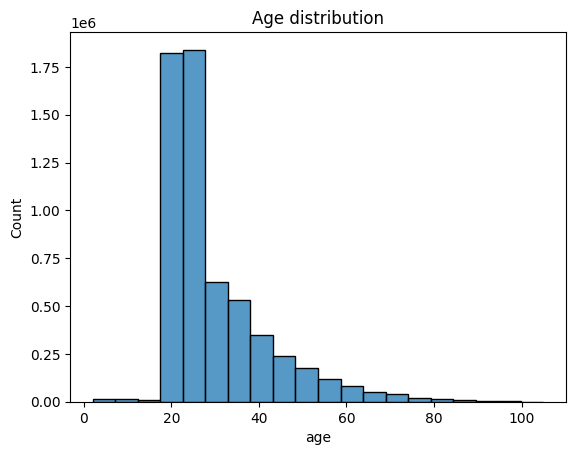

In [ ]:
sns.histplot(data=df_soc2, x='age', bins=20)
plt.title('Age distribution')

The majority of clients are young people in their twenties, but there are also several clients between the ages of 30 and 100.

In [ ]:
#group dataframe by mean age per customer group
age = pd.DataFrame(df_soc2.groupby('summary_activity_products')['age'].mean()).reset_index()
age.sort_values(by='age', ascending=False, inplace=True)
age

,summary_activity_products,age
0,1) only_active,33.988813
3,3) switch between active and inactive,30.841429
2,2b) only_inactive_no_products - lead,30.023769
1,2a) only_inactive_yes_products,25.786233


The mean age is higher for customers that are active throughout the entire dataset.

([0, 1, 2, 3],
 [Text(0, 0, '1) only_active'),
  Text(1, 0, '3) switch between active and inactive'),
  Text(2, 0, '2b) only_inactive_no_products - lead'),
  Text(3, 0, '2a) only_inactive_yes_products')])

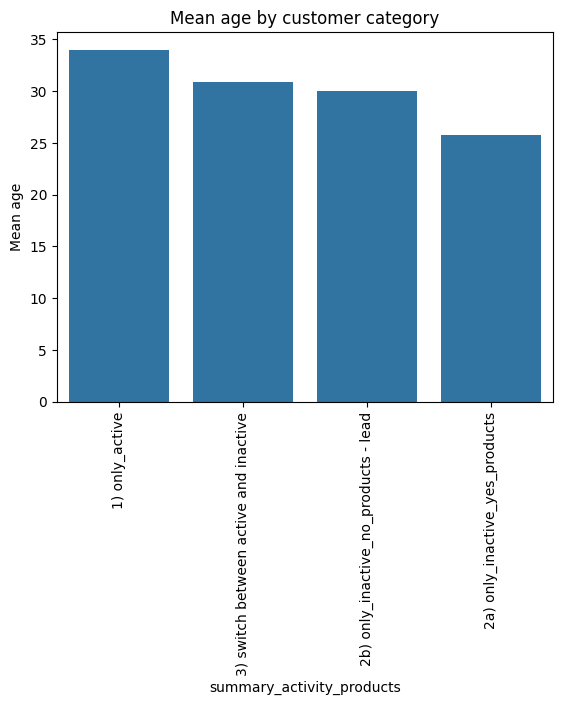

In [ ]:
sns.barplot(data=age, x='summary_activity_products', y='age')
plt.title('Mean age by customer category')
plt.ylabel('Mean age')
plt.xticks(rotation=90)

##### 3.4.2) Salary


In [ ]:
salary = pd.DataFrame(df_soc2.groupby('summary_activity_products')['salary'].mean()).reset_index()
salary.sort_values(by='salary', ascending=False, inplace=True)
salary

,summary_activity_products,salary
2,2b) only_inactive_no_products - lead,131477.302714
0,1) only_active,118273.693515
3,3) switch between active and inactive,112317.842285
1,2a) only_inactive_yes_products,109145.300962


The mean salary looks too high, there are probably some outliers.

In [ ]:
outlier_testing_col = ['salary']

In [ ]:
#define outliers based on quantiles
def univariate_outliers(s):
    """
    Input: series S
    Output: series with numerical values
    * 2: extreme high outlier
    * 1: moderate high outlier/suspected outlier
    * -1: moderate low outlier/suspected outlier
    * -2: extreme low outlier
    """
    q1 = s.quantile(q=0.25)
    q3 = s.quantile(q=0.75)
    iqr = q3 - q1
    out = (
        (s > (q3 + 1.5 * iqr)).astype(int)
        + (s > (q3 + 3 * iqr)).astype(int)
        - (s < (q1 - 1.5 * iqr)).astype(int)
        - (s < (q1 - 3 * iqr)).astype(int)
    )
    return out

In [ ]:
outl_df = pd.DataFrame(
    {
        "outl_" + col: univariate_outliers(df_soc2[col])
        for col in outlier_testing_col
    }
)

In [ ]:
outl_df.melt().reset_index().pivot_table(
    index="variable",
    columns="value",
    values="index",
    aggfunc="count",
    fill_value=0
)

value,0,1,2
variable,,,
outl_salary,5678672,170095,114157


There are indeed 114157 outliers in the salary column.

In [ ]:
df_soc3 = pd.concat([df_soc2, outl_df], axis=1)
df_soc3.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary,pk,summary_activity_products,outl_salary
0,1375586,2018-01-28,ES,29.0,H,35,N,87218.10,13755862018-01-28,3) switch between active and inactive,0
1,1050611,2018-01-28,ES,13.0,V,23,N,35548.74,10506112018-01-28,2a) only_inactive_yes_products,0
2,1050612,2018-01-28,ES,13.0,V,23,N,122179.11,10506122018-01-28,2a) only_inactive_yes_products,0
3,1050613,2018-01-28,ES,50.0,H,22,N,119775.54,10506132018-01-28,2a) only_inactive_yes_products,0
4,1050614,2018-01-28,ES,50.0,V,23,N,NaN,10506142018-01-28,1) only_active,0


Check if all customers that have a salary also have a payroll:

In [ ]:
df_soc4 = pd.merge(df_soc3, df_pro[['pk', 'payroll']], on='pk')
df_soc4.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary,pk,summary_activity_products,outl_salary,payroll
0,1375586,2018-01-28,ES,29.0,H,35,N,87218.10,13755862018-01-28,3) switch between active and inactive,0,0.0
1,1050611,2018-01-28,ES,13.0,V,23,N,35548.74,10506112018-01-28,2a) only_inactive_yes_products,0,0.0
2,1050612,2018-01-28,ES,13.0,V,23,N,122179.11,10506122018-01-28,2a) only_inactive_yes_products,0,0.0
3,1050613,2018-01-28,ES,50.0,H,22,N,119775.54,10506132018-01-28,2a) only_inactive_yes_products,0,0.0
4,1050614,2018-01-28,ES,50.0,V,23,N,NaN,10506142018-01-28,1) only_active,0,0.0


In [ ]:
#condition1: customer has a salary but no payroll
cond1 = (df_soc4['salary']>0)
cond2 = (df_soc4['payroll']==0)

#condition2: customer has a salary and payroll = 1
cond1 = (df_soc4['salary']>0)
cond3 =  (df_soc4['payroll']==1)

#condition3: salary value is missing
cond4 = (df_soc4['salary'].isna())

#condition4: payroll value is missing
cond5 = (df_soc4['payroll'].isna())

df_soc4['check payroll salary'] = np.select([cond1&cond2, cond1&cond3, cond4, cond5], ['salary but no payroll','salary and payroll', 'salary missing', 'payroll_missing'])
df_soc4.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary,pk,summary_activity_products,outl_salary,payroll,check payroll salary
0,1375586,2018-01-28,ES,29.0,H,35,N,87218.10,13755862018-01-28,3) switch between active and inactive,0,0.0,salary but no payroll
1,1050611,2018-01-28,ES,13.0,V,23,N,35548.74,10506112018-01-28,2a) only_inactive_yes_products,0,0.0,salary but no payroll
2,1050612,2018-01-28,ES,13.0,V,23,N,122179.11,10506122018-01-28,2a) only_inactive_yes_products,0,0.0,salary but no payroll
3,1050613,2018-01-28,ES,50.0,H,22,N,119775.54,10506132018-01-28,2a) only_inactive_yes_products,0,0.0,salary but no payroll
4,1050614,2018-01-28,ES,50.0,V,23,N,NaN,10506142018-01-28,1) only_active,0,0.0,salary missing


In [ ]:
check = pd.DataFrame(df_soc4.groupby('check payroll salary')['pk'].count()).reset_index()
check

,check payroll salary,pk
0,payroll_missing,50
1,salary and payroll,168430
2,salary but no payroll,4282341
3,salary missing,1512103


The salary column has a high number of missing values (1512103) and many high outliers (114157). Also, it is interesting to see that in 4282341 cases there was a salary, but the value for payroll was "0". This could mean that the customers do not actually receive these salaries in their easy money account every month, it is just something that they mentioned to the bank when signing up. Also, given how many extreme outliers and missing values there are this is probably not a reliable variable to use for any type of modeling.

In [ ]:
df_soc4[df_soc4['pk_cid']==1050611]

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary,pk,summary_activity_products,outl_salary,payroll,check payroll salary
1,1050611,2018-01-28,ES,13.0,V,23,N,35548.74,10506112018-01-28,2a) only_inactive_yes_products,0,0.0,salary but no payroll
472597,1050611,2018-02-28,ES,13.0,V,23,N,35548.74,10506112018-02-28,2a) only_inactive_yes_products,0,0.0,salary but no payroll
693182,1050611,2018-03-28,ES,13.0,V,23,N,35548.74,10506112018-03-28,2a) only_inactive_yes_products,0,0.0,salary but no payroll
969536,1050611,2018-04-28,ES,13.0,V,23,N,35548.74,10506112018-04-28,2a) only_inactive_yes_products,0,0.0,salary but no payroll
981487,1050611,2018-05-28,ES,13.0,V,23,N,35548.74,10506112018-05-28,2a) only_inactive_yes_products,0,0.0,salary but no payroll
1257174,1050611,2018-06-28,ES,13.0,V,23,N,35548.74,10506112018-06-28,2a) only_inactive_yes_products,0,0.0,salary but no payroll
1581536,1050611,2018-07-28,ES,13.0,V,23,N,35548.74,10506112018-07-28,2a) only_inactive_yes_products,0,0.0,salary but no payroll
2050097,1050611,2018-08-28,ES,13.0,V,23,N,35548.74,10506112018-08-28,2a) only_inactive_yes_products,0,0.0,salary but no payroll
2331064,1050611,2018-09-28,ES,13.0,V,23,N,35548.74,10506112018-09-28,2a) only_inactive_yes_products,0,0.0,salary but no payroll
2673592,1050611,2018-10-28,ES,13.0,V,23,N,35548.74,10506112018-10-28,2a) only_inactive_yes_products,0,0.0,salary but no payroll


In [ ]:
df_soc4[df_soc4['pk_cid']==1375586]

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary,pk,summary_activity_products,outl_salary,payroll,check payroll salary
0,1375586,2018-01-28,ES,29.0,H,35,N,87218.1,13755862018-01-28,3) switch between active and inactive,0,0.0,salary but no payroll
346322,1375586,2018-02-28,ES,29.0,H,35,N,87218.1,13755862018-02-28,3) switch between active and inactive,0,0.0,salary but no payroll
592407,1375586,2018-03-28,ES,29.0,H,35,N,87218.1,13755862018-03-28,3) switch between active and inactive,0,0.0,salary but no payroll
831104,1375586,2018-04-28,ES,29.0,H,35,N,87218.1,13755862018-04-28,3) switch between active and inactive,0,0.0,salary but no payroll
1108457,1375586,2018-05-28,ES,29.0,H,35,N,87218.1,13755862018-05-28,3) switch between active and inactive,0,0.0,salary but no payroll
1357280,1375586,2018-06-28,ES,29.0,H,35,N,87218.1,13755862018-06-28,3) switch between active and inactive,0,0.0,salary but no payroll
1791360,1375586,2018-07-28,ES,29.0,H,35,N,87218.1,13755862018-07-28,3) switch between active and inactive,0,0.0,salary but no payroll
1988936,1375586,2018-08-28,ES,29.0,H,36,N,87218.1,13755862018-08-28,3) switch between active and inactive,0,0.0,salary but no payroll
2487565,1375586,2018-09-28,ES,29.0,H,36,N,87218.1,13755862018-09-28,3) switch between active and inactive,0,0.0,salary but no payroll
2753984,1375586,2018-10-28,ES,29.0,H,36,N,87218.1,13755862018-10-28,3) switch between active and inactive,0,0.0,salary but no payroll


It is also interesting to see that the salary has the same value per customer every month, for example for customer 1050611 it is over 35 K and for customer 1375586 over 87K, which is way higher than the usual men salaries in Spain.

##### 3.4.3) Countries

In [ ]:
countries = pd.DataFrame(df_soc4.groupby("country_id")['pk_cid'].nunique()).reset_index()
countries.sort_values(by='pk_cid', ascending=False)

,country_id,pk_cid
15,ES,456227
19,GB,34
39,US,18
5,CH,16
17,FR,16
11,DE,13
2,BE,7
3,BR,6
40,VE,5
28,MX,5


The great majority of customer IDs is from Spain, both the active and inactive ones.

In [ ]:
perc = (df_soc4[df_soc4['country_id']=="ES"]['pk_cid'].nunique())/(df_soc4['pk_cid'].nunique())*100
print("Percentage of Spanish customers:", perc,"%")

Percentage of Spanish customers: 99.96800862452424 %


##### 3.4.4) Gender

In [ ]:
gend = pd.DataFrame(df_soc4.groupby('gender')['pk_cid'].nunique()).reset_index()
gend

,gender,pk_cid
0,H,233862
1,V,222550


In terms on gender the dataset is pretty balanced, 233862 women and 222550 men.

Text(0.5, 1.0, 'Gender distribution')

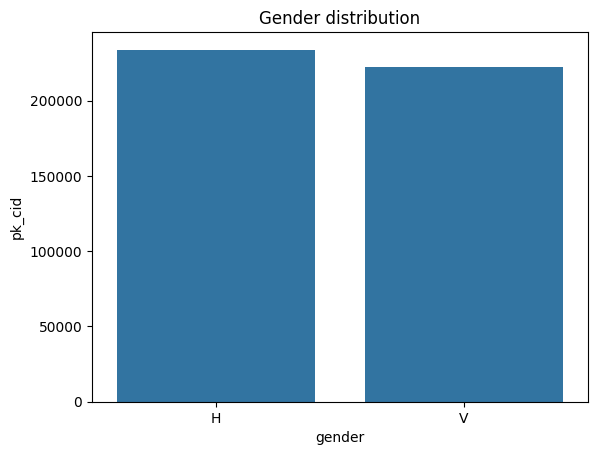

In [ ]:
sns.barplot(gend, x='gender', y='pk_cid')
plt.title('Gender distribution')

##### 3.4.5) Deceased

In [ ]:
dec = pd.DataFrame(df_soc4.groupby('deceased')['pk_cid'].nunique()).reset_index()
dec

,deceased,pk_cid
0,N,456318
1,S,129


There are 129 customer IDs that belong to deceased customers, those should not be considered in the customer segmentation.

##### 3.4.5) Region Code

In [ ]:
reg = pd.DataFrame(df_soc4.groupby('region_code')['pk_cid'].nunique()).reset_index()
reg.sort_values(by='pk_cid', ascending=False, inplace=True)
reg.head(10)

,region_code,pk_cid
27,28.0,98597
7,8.0,46259
45,46.0,27800
29,30.0,21807
40,41.0,21397
14,15.0,18213
28,29.0,13663
2,3.0,13545
35,36.0,12719
10,11.0,11810


The majority of unique customer IDs belongs to region code 28.0, but other region codes such as 8.0 also seem to be important.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0'),
  Text(12, 0, '13.0'),
  Text(13, 0, '14.0'),
  Text(14, 0, '15.0'),
  Text(15, 0, '16.0'),
  Text(16, 0, '17.0'),
  Text(17, 0, '18.0'),
  Text(18, 0, '19.0'),
  Text(19, 0, '20.0'),
  Text(20, 0, '21.0'),
  Text(21, 0, '22.0'),
  Text(22, 0, '23.0'),
  Text(23, 0, '24.0'),
  Text(24, 0, '25.0'),
  Text(25, 0, '26.0'),
  Text(26, 0, '27.0'),
  Text(27, 0, '28.0'),
  Text(28, 0, '29.0'),
  Text(29, 0, '30.0'),
  Text(30, 0, '31.0'),
  T

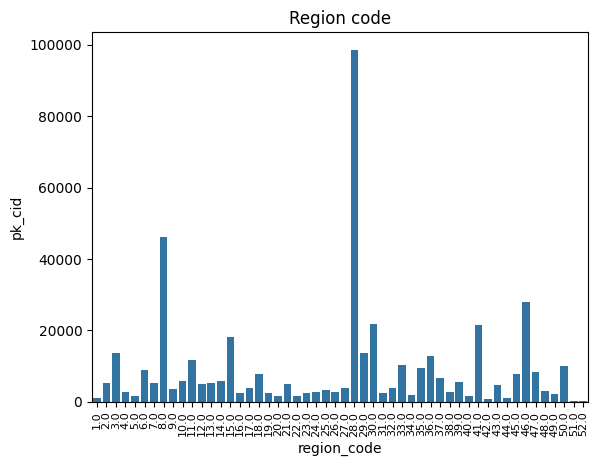

In [ ]:
sns.barplot(reg, x='region_code', y='pk_cid')
plt.title('Region code')
plt.xticks(rotation=90, size=8)

##### 3.4.6) Customer business segment

In [ ]:
seg = pd.DataFrame(df_com.groupby('segment')['pk_cid'].nunique()).reset_index()
seg

,segment,pk_cid
0,01 - TOP,10199
1,02 - PARTICULARES,160856
2,03 - UNIVERSITARIO,289287


The most important customer business segments are "02 - PARTICULRES" and "03 - UNIVERSITARIO"

Text(0.5, 1.0, 'Customer Business Segment')

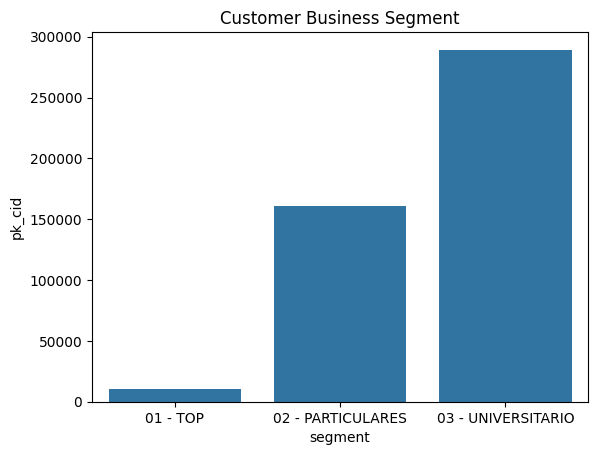

In [ ]:
sns.barplot(data=seg, x='segment', y='pk_cid')
plt.title('Customer Business Segment')

##### 3.4.6) Entry Channel

In [ ]:
entry = pd.DataFrame(df_com.groupby('entry_channel')['pk_cid'].nunique()).reset_index()
entry.sort_values(by='pk_cid', ascending=False, inplace=True)
entry.head(10)

,entry_channel,pk_cid
57,KHE,196706
65,KHQ,76372
45,KFC,60359
61,KHM,32899
17,KAT,27143
62,KHN,17427
59,KHK,17225
67,RED,5279
44,KFA,5169
56,KHD,4865


There seem to be some important entry channels in the dataset such as KHE, and others that have almost no entries.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67],
 [Text(0, 0, 'KHE'),
  Text(1, 0, 'KHQ'),
  Text(2, 0, 'KFC'),
  Text(3, 0, 'KHM'),
  Text(4, 0, 'KAT'),
  Text(5, 0, 'KHN'),
  Text(6, 0, 'KHK'),
  Text(7, 0, 'RED'),
  Text(8, 0, 'KFA'),
  Text(9, 0, 'KHD'),
  Text(10, 0, 'KHL'),
  Text(11, 0, 'KHF'),
  Text(12, 0, 'KHO'),
  Text(13, 0, 'KAZ'),
  Text(14, 0, 'KHC'),
  Text(15, 0, 'KBG'),
  Text(16, 0, 'KHP'),
  Text(17, 0, '007'),
  Text(18, 0, 'KEH'),
  Text(19, 0, '013'),
  Text(20, 0, 'KAG'),
  Text(21, 0, 'KAS'),
  Text(22, 0, 'KAA'),
  Text(23, 0, 'KAY'),
  Text(24, 0, 'KBZ'),
  Text(25, 0, 'KAR'),
  Text(26, 0, 'KCC'),
  Text(27, 0, 'KA

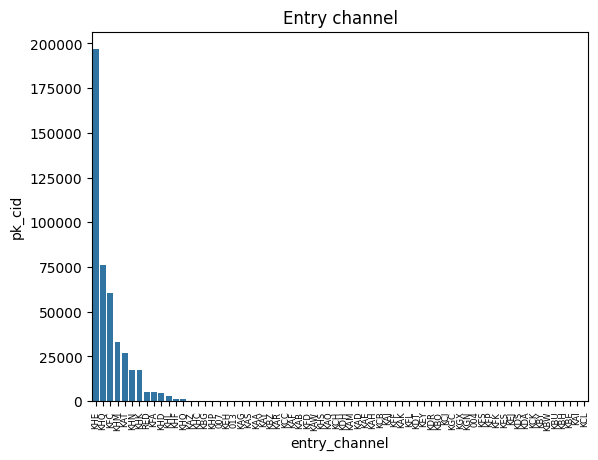

In [ ]:
sns.barplot(data=entry, x='entry_channel', y='pk_cid')
plt.title('Entry channel')
plt.xticks(rotation=90, size=6)